In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [28]:
# data loading
train_data= pd.read_csv('/content/ridgetrain.txt', delim_whitespace=True, header=None)
test_data= pd.read_csv('/content/ridgetest.txt', delim_whitespace=True, header=None)
x_train= np.array(train_data[0])
y_train= np.array(train_data[1])
x_test= np.array(test_data[0])
y_test= np.array(test_data[1])

In [29]:
def kernel(x , y):
  return np.exp(-0.1*np.square(x.reshape(-1,1)- y.reshape(1,-1)))

In [30]:
lambdas= [0.1,1,10,100]
id= np.identity(x_train.shape[0])
k= kernel(x_train,x_train)

RMSE for lambda = 0.1 is 0.032577670293572294
RMSE for lambda = 1 is 0.1703039034420254
RMSE for lambda = 10 is 0.6092671596540067
RMSE for lambda = 100 is 0.9110858052767243


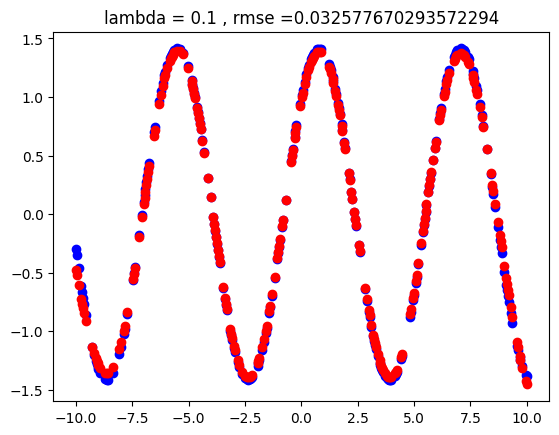

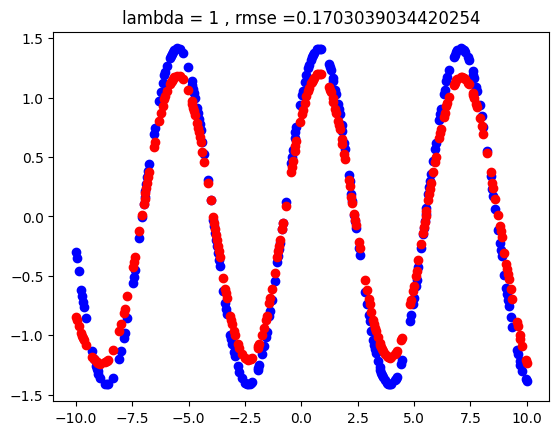

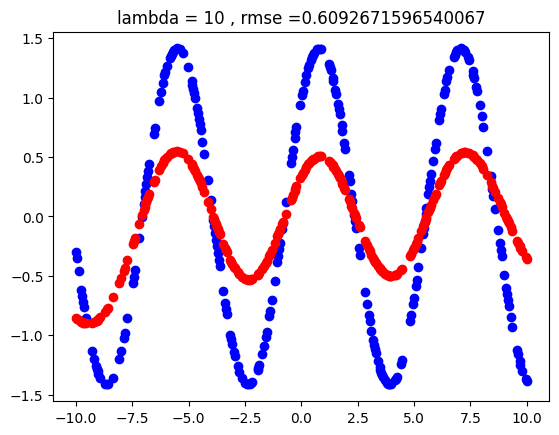

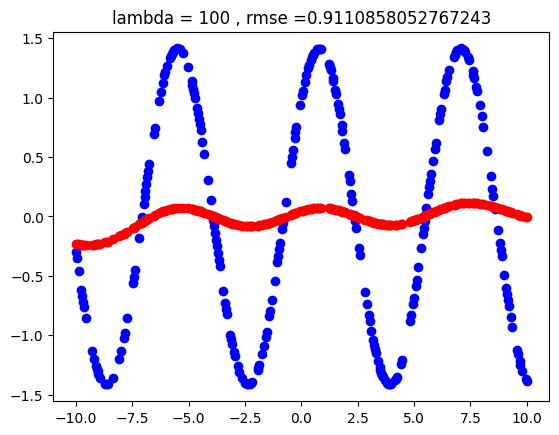

In [40]:
for l in lambdas:
  alpha= np.dot(np.linalg.inv(k + l*id), y_train.reshape(-1,1))
  k_t= kernel(x_train,x_test)
  y_pred = np.dot(alpha.T, k_t).reshape(-1,1)

  rmse= np.sqrt(mean_squared_error(y_test.reshape(-1,1),y_pred))
  print('RMSE for lambda = '+ str(l) + ' is ' + str(rmse) )

  plt.figure()
  plt.plot(x_test,y_test, 'bo')
  plt.plot(x_test,y_pred, 'ro')
  plt.title('lambda = '+str(l) + ' , rmse ='+ str(rmse))
plt.show()